In [65]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
FEG2012=pd.read_excel('data/2012FEGuide.xlsx')
FEG2012.columns = FEG2012.columns.str.replace(' ', '')
FEG2012.columns = FEG2012.columns.str.replace('?', '')
FEG2012.columns = FEG2012.columns.str.replace('#', 'num')
FEG2012.columns = FEG2012.columns.str.replace('%', 'percen')

In [31]:
for x in FEG2012.columns:
    print(f'{x}')

ModelYr
MfrName
Division
Carline
VerifyMfrCd
Index(ModelTypeIndex)
EngDispl
numCyl
TransinFEGuide(MFRenteredfordataenteredafterMay132011)
CityFE(Guide)-ConventionalFuel
HwyFE(Guide)-ConventionalFuel
CombFE(Guide)-ConventionalFuel
CityUnadjFE-ConventionalFuel
HwyUnadjFE-ConventionalFuel
CombUnadjFE-ConventionalFuel
CityUnrdAdjFE-ConventionalFuel
HwyUnrdAdjFE-ConventionalFuel
CombUnrdAdjFE-ConventionalFuel
Guzzler
AirAspirMethod
AirAspirationMethodDesc
Trans
TransDesc
Trans,Other
numGears
TransLockup
TransCreeperGear
DriveSys
DriveDesc
MaxEthanolpercen-Gasoline
MaxBiodieselpercen
Range1-ModelTypeDrivingRange-ConventionalFuel
FuelUsage-ConventionalFuel
FuelUsageDesc-ConventionalFuel
FuelUnit-ConventionalFuel
FuelUnitDesc-ConventionalFuel
GasGuzzlerExempt(WhereTruck=1975NHTSAtruckdefinition)
GasGuzzlerExemptDesc(WhereTruck=1975NHTSAtruckdefinition)
2DrPassVol
2DrLuggVol
4DrPassVol
4DrLuggVol
HtchbkPassVol
HtchbkLuggVol
AnnualFuel1Cost-ConventionalFuel
EPACalculatedAnnualFuelCost-Convention

In [41]:
fecon=pd.DataFrame()


0        8
1        2
2       11
3        1
4        3
        ..
1137    43
1138    21
1139    42
1140    41
1141    76
Name: Index(ModelTypeIndex), Length: 1142, dtype: int64

In [45]:
fecon=FEG2012[['MfrName','Carline','ModelYr','CityFE(Guide)-ConventionalFuel',\
'HwyFE(Guide)-ConventionalFuel','CombFE(Guide)-ConventionalFuel',\
'Guzzler','AnnualFuel1Cost-ConventionalFuel']]

In [49]:
fecon['MfrName'].unique()

array(['aston martin', 'Audi', 'Bentley', 'BMW', 'Bugatti',
       'General Motors', 'Ferrari', 'Honda', 'Lamborghini', 'Toyota',
       'MAZDA', 'McLaren Automotive ', 'Mercedes-Benz', 'Nissan',
       'Porsche', 'Chrysler Group LLC', 'Jaguar Cars', 'Lotus',
       'Mitsubishi Motors NA', 'Ford Motor Company', 'Hyundai',
       'Maserati', 'Roush', 'Volkswagen', 'Volvo', 'Kia',
       'Mitsubishi Motors Co', 'Rolls-Royce', 'Saab Cars North America',
       'Subaru', 'Suzuki', 'VPG', 'Land Rover'], dtype=object)

In [53]:
#fecon['MakeModel']=fecon.apply(lambda row: row.MfrName+row.Carline, axis=1)
#df.apply(lambda row: row.a + row.b, axis=1)
fn = lambda row: row.MfrName + row.Carline # define a function for the new column
col = fecon.apply(fn, axis=1) # get column data with an index
fecon = fecon.assign(MakeModel=col.values) # assign values to column 'c'

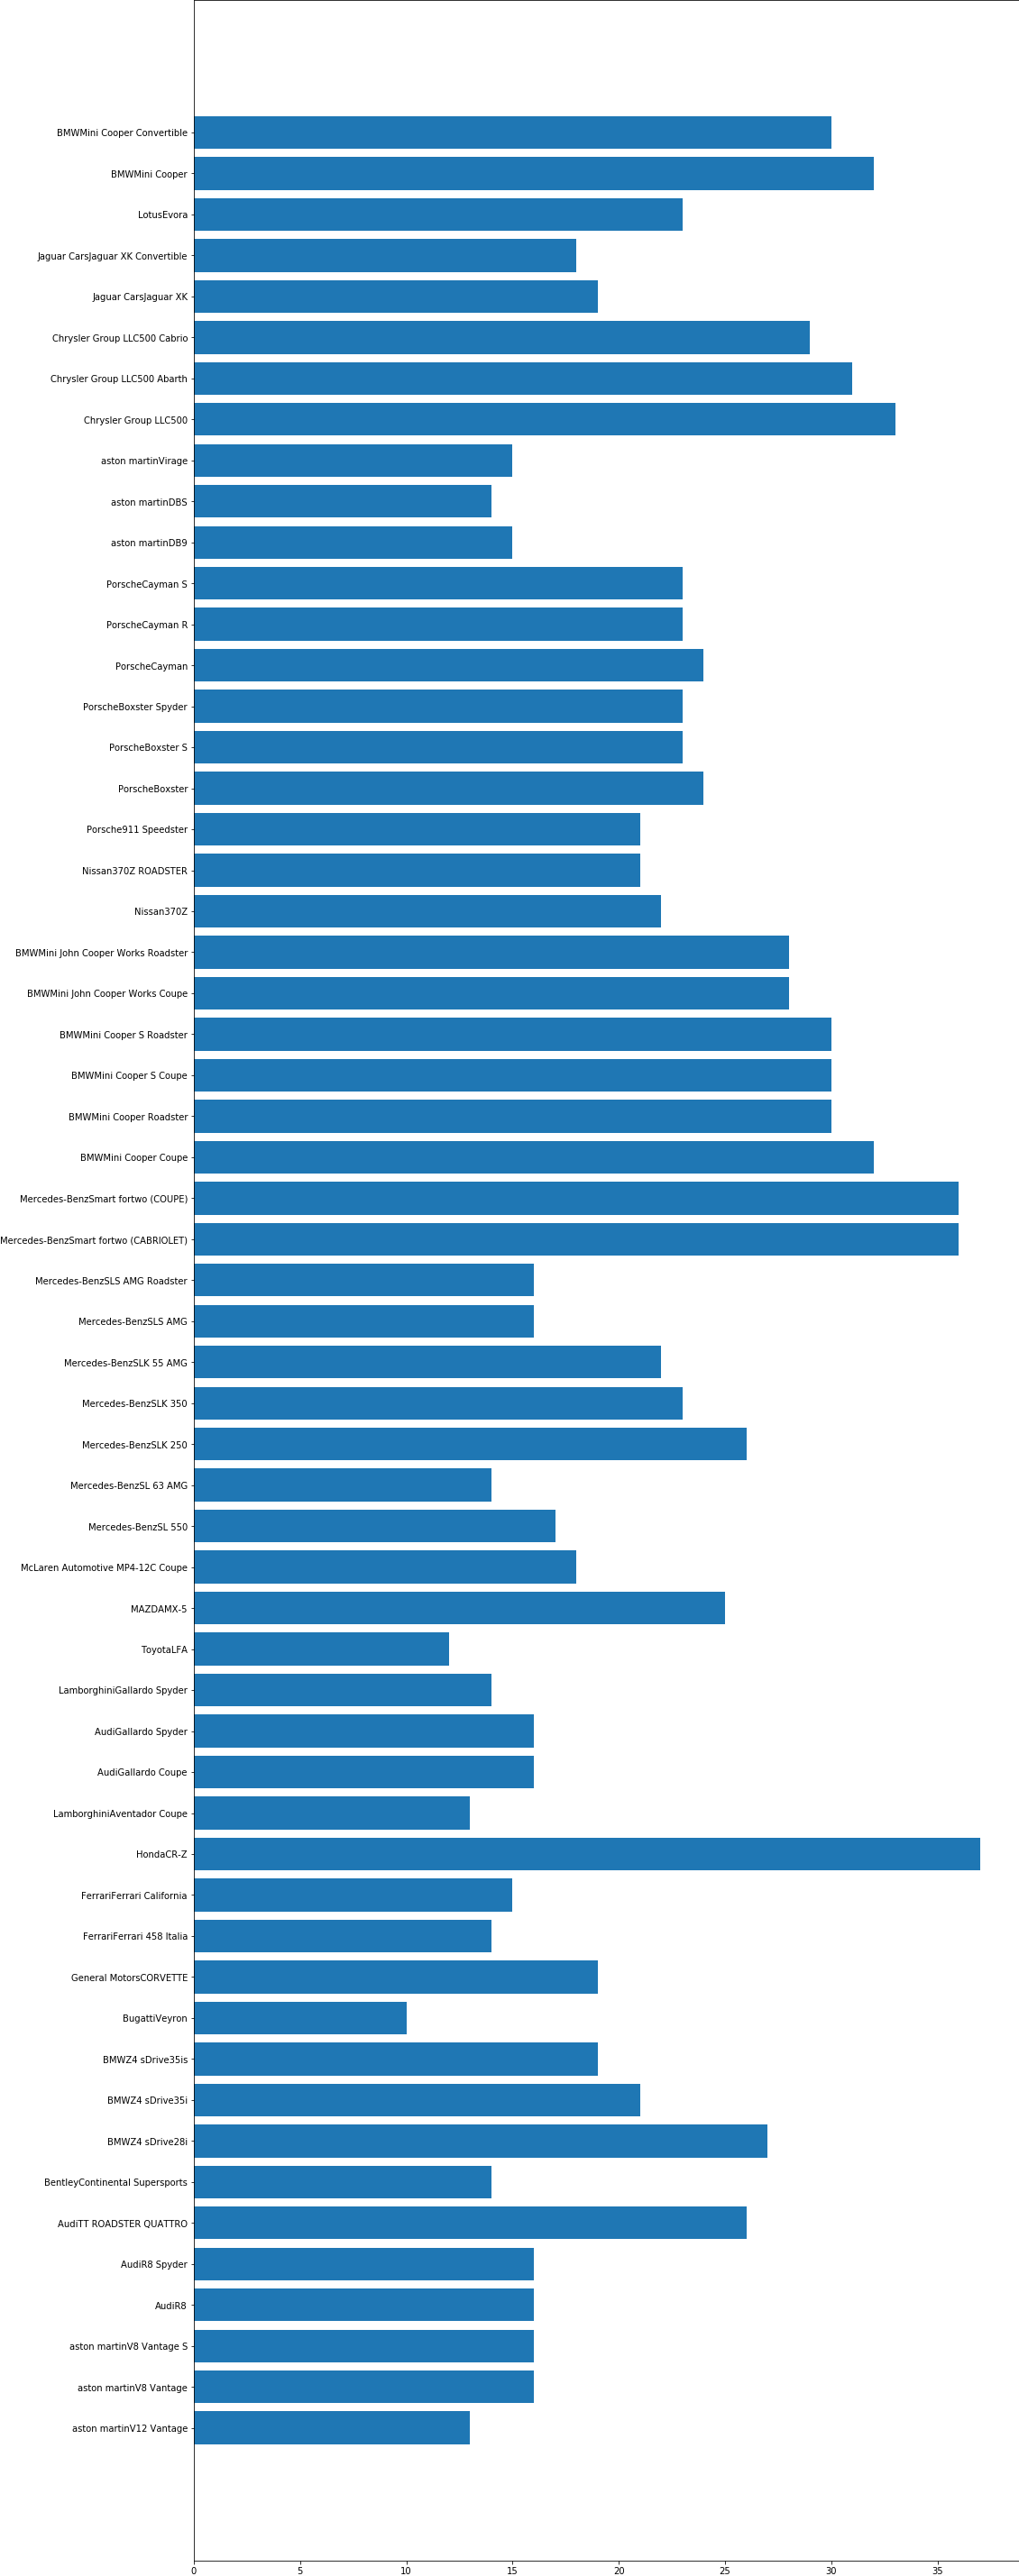

In [78]:
plt.subplots(figsize=(16,40))
plt.barh(fecon.MakeModel[:100], fecon['CombFE(Guide)-ConventionalFuel'][:100])
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()